## Matplotlib

[Matplotlib](https://matplotlib.org/) 是一个Python2D和3D绘图库，可绘制高质量的图形，包括折线图，轮廓图，直方图，功率谱，条形图，误差图，散点图等。

Matplotlib提供了两个接口：类似Matlab的API（`matlab.pylab`）和matplotlib面向对象的API。前者的语法非常接近Matlab软件的绘图功能，适合绘画简单的图形用于快速分析。而后者使用面向对象的方法来更好地控制和自定义图形，并允许用户在一个画布对象上添加一个或多个轴，且每个轴是分开的。因此，可以在一个图形画布中放置多个图，并且每个图都可单独控制。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

------

### Global settings

在创建图形之前，matplotlib允许用户使用style和rcParams自定义Matplotlib的画图样式和一些基本属性，这些设置是全局设置，用户定义的样式和属性将应用于所有后续图形。

matplotlib的 `style` 模块可用于定义特定的样式。 matplotlib提供了许多预定义的样式，请参阅其完整的列表 [here](https://github.com/matplotlib/matplotlib/tree/master/lib/matplotlib/mpl-data/stylelib). Or:

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


To define a style, use `plt.style.use('style name here')`.

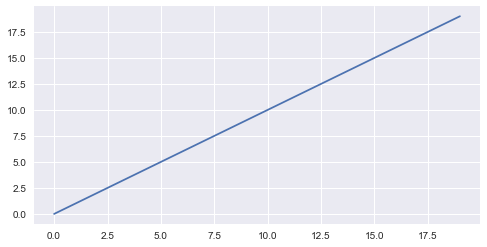

In [3]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(20))

 `matplotlib.rcParams` 是字典样式的变量，用于存储所有属性设置，可用于更改默认属性（如线宽，字体大小等）

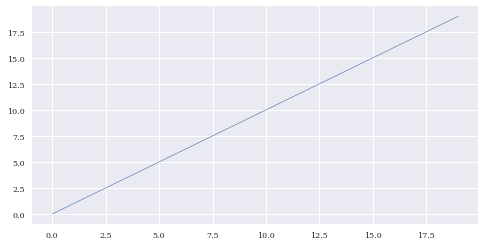

In [4]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.6
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 11
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['font.family'] = 'serif'

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(20))

------

### Figure size and DPI

进行全局设置后，我们可以开始绘制实际图形。使用matplotlib面向对象的API，我们可以用plt.subplots()创建一个图形实例，它将返回两个参数：前者为图形对象，后者为轴对象。在创建过程中不仅可以向图形实例添加任意数量的轴（所有轴实例都存储在轴对象中），还可以通过提供关键字参数来指定图形尺寸和DPI。

Text(0.5, 1.0, 'Title')

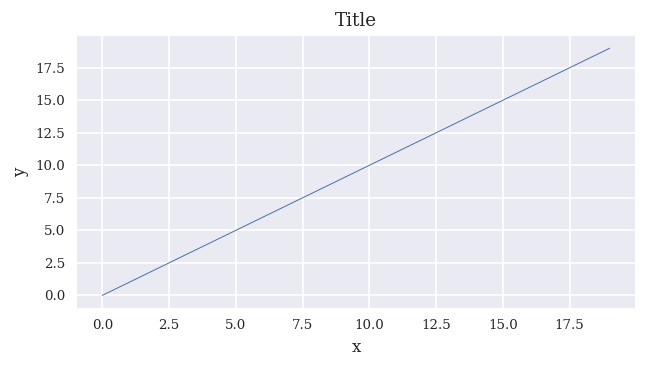

In [5]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=120)
ax.plot(np.arange(20))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Title')

在完成图形后，我们可以使用`fig.savefig`函数保存图形，保存过程中可以指定格式以及DPI。 Matplotlib支持多种格式，例如PNG，EPS，SVG和PDF。

In [6]:
fig.savefig('myfigure.png', dpi=300)

------

### Titles, labels and legends

使用与ax对象相关联的set_title、set_xlabel、set_ylabel可以添加标题和标签。同时，可以以字典的形式指定关键字参数来修改属性（例如字体和字体大小）。

Text(0.5, 1.0, 'Title')

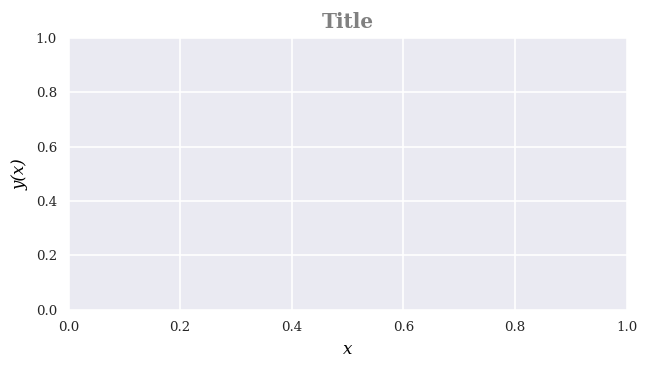

In [7]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=120)
ax.set_xlabel('x', color='black', size=10, style='italic')
ax.set_ylabel('y(x)', color='black', size=10, style='italic')
ax.set_title('Title', color='grey', size=12, weight='bold')

可以通过在实际绘图函数中指定label关键字参数来添加legend，并可以使用ax.legend()函数对其进行修饰。

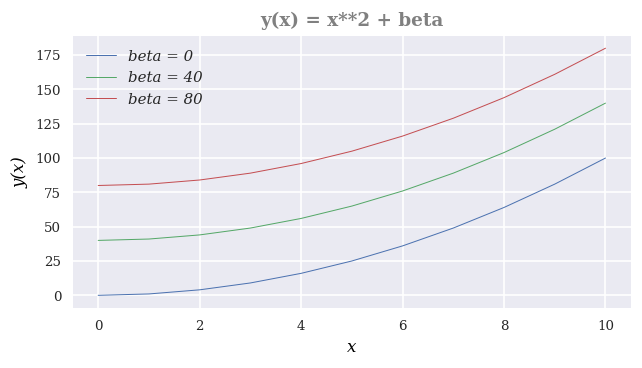

In [8]:
x = np.arange(11)

fig, ax = plt.subplots(figsize=(6, 3), dpi=120)
ax.set_xlabel('x', color='black', fontsize=10, style='italic')
ax.set_ylabel('y(x)', color='black', fontsize=10, style='italic')
ax.set_title('y(x) = x**2 + beta', color='grey', fontsize=11, weight='bold')
ax.plot(x, x**2., label='beta = 0')
ax.plot(x, x**2. + 40, label='beta = 40')
ax.plot(x, x**2. + 80, label='beta = 80')
ax.legend(loc=2, prop={'size': 9, 'weight': 'normal', 'style': 'italic'})  # loc means location and 2 means upper left

------

### Lines and markers

在绘图函数中通过提供关键字参数可以定义线条和标记的样式，Matplotlib所支持的线条样式可以在[此处](https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html#sphx-glr-gallery-lines-bars-and-markers-linestyles-py) 查找，填充/未填充的标记类型可以在[此处](https://matplotlib.org/gallery/lines_bars_and_markers/marker_reference.html#sphx-glr-gallery-lines-bars-and-markers-marker-reference-py) 获得。在matplotlib中，有[8种方式](https://matplotlib.org/gallery/color/color_demo.html#sphx-glr-gallery-color-color-demo-py) 可以用来指定图形元素的颜色值。让我们用一些实例来演示如何使用它们。首先，我们可以使用类似于Matlab的语法来定义线条和标记的颜色，例如字符b或g，其中b表示蓝色，g表示绿色。或者，可以使用其名称或RGB十六进制代码定义颜色。 `alpha`关键字用于控制线条和标记的透明度。

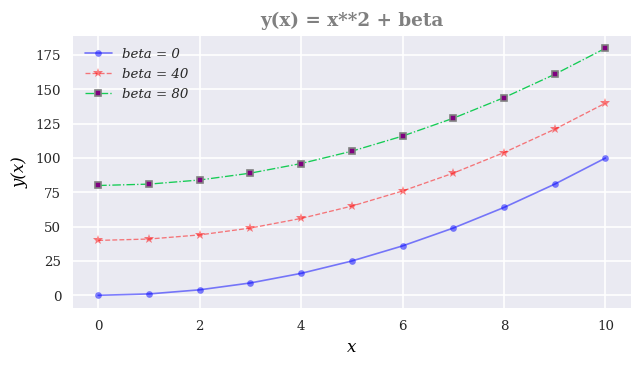

In [9]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=120)

ax.set_xlabel('x', color='black', fontsize=10, style='italic')
ax.set_ylabel('y(x)', color='black', fontsize=10, style='italic')
ax.set_title('y(x) = x**2 + beta', color='grey', fontsize=11, weight='bold')

ax.plot(x, x**2., 'b-', lw=1, marker='o', ms=4, alpha=0.5, label='beta = 0')  # blue solid line with line width = 1 
ax.plot(x, x**2. + 40, color='red', ls='--', lw=0.8, marker='*', ms=6, alpha=0.5, label='beta = 40')  # red dashed line
ax.plot(x, x**2. + 80, color='#15cc55', ls='-.', lw=0.8, marker='s', ms=4, 
        markerfacecolor="purple", markeredgewidth=1, markeredgecolor="grey", alpha=1, label='beta = 80')  # green dash-dotted line

ax.legend(loc=2, prop={'size': 8, 'weight': 'normal', 'style': 'italic'})  # loc means location and 2 means upper left

------

### Axis appearance

为了制作高质量的图形，通常需要自定义坐标轴的一些属性，包括刻度范围，刻度线位置，自定义刻度标签和网格等。使用ax.set_xlim()和ax.set_xlim()方法可以设置x和y轴的起始值，或者使用axis('tight')来自动将坐标轴的范围设置为紧促型。通过向set_xticks和set_yticks两个函数提供列表值可以对刻度进行设置。使用set_xticklabels和set_yticklabels可以将自定义的刻度标签列表放置指定的刻度线位置。使用`ax.grid`，我们可以打开/关闭网格线，以及修改其样式，颜色等。

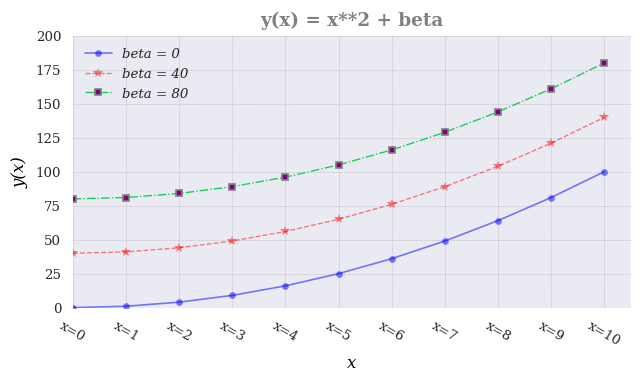

In [10]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=120)

ax.set_xlabel('x', color='black', fontsize=10, style='italic')
ax.set_ylabel('y(x)', color='black', fontsize=10, style='italic')
ax.set_title('y(x) = x**2 + beta', color='grey', fontsize=11, weight='bold')

ax.plot(x, x**2., 'b-', lw=1, marker='o', ms=4, alpha=0.5, label='beta = 0')  # blue solid line with line width = 1 
ax.plot(x, x**2. + 40, color='red', ls='--', lw=0.8, marker='*', ms=6, alpha=0.5, label='beta = 40')  # red dashed line
ax.plot(x, x**2. + 80, color='#15cc55', ls='-.', lw=0.8, marker='s', ms=4, 
        markerfacecolor="purple", markeredgewidth=1, markeredgecolor="grey", alpha=1, label='beta = 80')  # green dash-dotted line

ax.legend(loc=2, prop={'size': 8, 'weight': 'normal', 'style': 'italic'})  # loc means location and 2 means upper left

# set x&y axis ranges
ax.set_ylim([0, 200])
ax.set_xlim([0, 10.5])

# ticks
ax.set_xticks(np.arange(11))

# customer tick labels
ax.set_xticklabels(['x=%s' % i for i in np.arange(11)], fontsize=8, rotation=-30)

# grid lines
ax.grid(color='grey', alpha=0.5, linestyle='dashed', linewidth=0.3)

------

### Text

为了满足一些出版物的图形要求，我们应确保以专业的方式来展示图形，比如用正确的希腊字母显示科学方程式。为此，我们有时候需要使用LaTeX格式的文本，其用法为将要Latex格式化的文本放入两个美元符号之间，例如： $\$$y(x) = x^2 + \beta$\$$ 将变成 $y(x) = x^2 + \beta$。请注意，在LaTeX中，反斜杠是常用符号，例如\beta表示希腊字母$\beta$。但是，在Python字符串中，反斜杠具有特殊含义，即字符转义。为了消除这种影响，我们需要通过在文本字符串前加一个r来使用Python的 *raw* 字符串，例如：使用`r'\beta'`代替`'\beta'`。

我们还可以使用`ax.text`函数为图形添加文本注释，该函数也支持LaTeX格式。

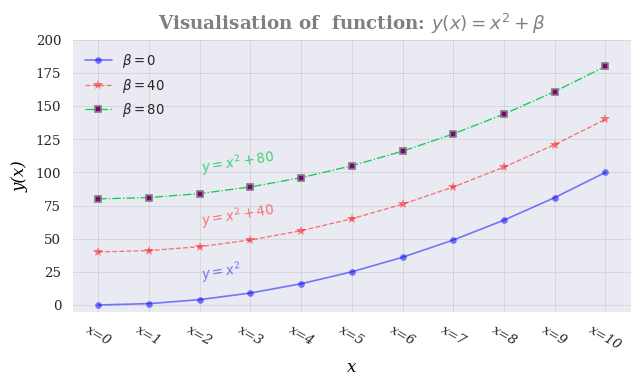

In [11]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=120)

ax.set_xlabel('x', color='black', fontsize=10, style='italic')
ax.set_ylabel('y(x)', color='black', fontsize=10, style='italic')
ax.set_title(r'Visualisation of  function: $y(x) = x^2 + \beta$', color='grey', fontsize=11, weight='bold')

ax.plot(x, x**2., 'b-', lw=1, marker='o', ms=4, alpha=0.5, label=r'$\beta = 0$')  # blue solid line with line width = 1 
ax.plot(x, x**2. + 40, color='red', ls='--', lw=0.8, marker='*', ms=6, alpha=0.5, label=r'$\beta = 40$')  # red dashed line
ax.plot(x, x**2. + 80, color='#15cc55', ls='-.', lw=0.8, marker='s', ms=4, 
        markerfacecolor="purple", markeredgewidth=1, markeredgecolor="grey", alpha=1, label=r'$\beta = 80$')  # green dash-dotted line

ax.legend(loc=2, prop={'size': 8, 'weight': 'normal', 'style': 'italic'})  # loc means location and 2 means upper left

# set x&y axis ranges
ax.set_ylim([-5, 200])
ax.set_xlim([-0.5, 10.5])

# ticks
ax.set_xticks(np.arange(11))

# customer tick labels
ax.set_xticklabels([r'x=%s' % i for i in np.arange(11)], fontsize=8, style='italic', rotation=-30)

# grid lines
ax.grid(color='grey', alpha=0.5, linestyle='dashed', linewidth=0.3)

# text annotation
ax.text(2, 100, r"$y=x^2 + 80$", fontsize=8, color="#15cc55", alpha=.8, style='italic', rotation=9)
ax.text(2, 60, r"$y=x^2 + 40$", fontsize=8, color="red", alpha=.5, style='italic', rotation=9)
ax.text(2, 19, r"$y=x^2$", fontsize=8, color="blue", alpha=.5, style='italic', rotation=9)

plt.show()

------

### Multiple plots

为了在一个画图板中放置多个图，我们可以通过使用诸如subplots、subplot2grid、gridspec之类的布局管理器或inset_axes函数来设定子图的空间布局。

* Subplots

`Subplots` 可以通过指定行和列的数量在常规网格中创建多个绘图区。

ax has a type of  <class 'numpy.ndarray'>


Text(0.5, 1.0, 'Box plot')

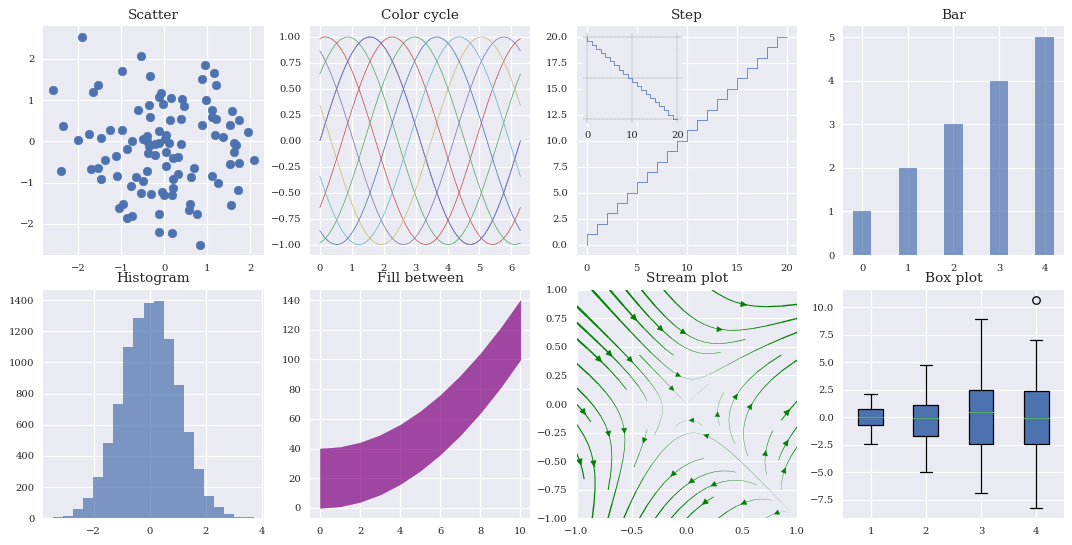

In [12]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(2, 4, figsize=(12, 6), dpi=90)
fig.tight_layout()
print('ax has a type of ', type(ax))

# scatter plot
x, y = np.random.normal(size=(2, 100))
ax[0, 0].scatter(x, y)
ax[0, 0].set_title('Scatter')

# Plotting 10 sinusoidal lines with default color cycle
x = np.linspace(0, 2 * np.pi, 50)
shift = np.linspace(0, 2 * np.pi, 10)
for s in shift:
    ax[0, 1].plot(x, np.sin(x + s), '-')
ax[0, 1].set_title('Color cycle')
    
# Step plot
ax[0, 2].step(np.arange(21), np.arange(21))
ax[0, 2].set_title('Step')
inset_axes = inset_axes(ax[0, 2], width="45%", height=1.0, loc=2)
inset_axes.step(np.arange(21), -1 * np.arange(21))
inset_axes.grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.3)
inset_axes.set_yticklabels([])

# bar chart
ax[0, 3].bar(np.arange(5), np.arange(5) + 1, align="center", width=0.4, alpha=0.7)
ax[0, 3].set_title('Bar')

# histogram
ax[1, 0].hist(np.random.randn(10000), alpha=0.7, bins=20)
ax[1, 0].set_title('Histogram')

# fill between
x = np.arange(11)
ax[1, 1].fill_between(x, x**2, x**2+40, alpha=0.7, color='purple')
ax[1, 1].set_title('Fill between')

# Stream plot
Y, X = np.mgrid[-1:1:100j, -1:1:100j]
U = X**2 + Y
V = X - Y**2
speed = np.sqrt(U*U + V*V)
lw = speed / speed.max()
ax[1, 2].streamplot(X, Y, U, V, density=0.5, color='green', linewidth=lw * 2.)
ax[1, 2].set_title('Stream plot')

# box plot
data = [np.random.normal(0, std, 100) for std in range(1, 5)]
bplot = ax[1, 3].boxplot(data, vert=True, patch_artist=True)
ax[1, 3].set_title('Box plot')


上面的方法可以同属创建多个绘图区，但是每个绘图区的坐标系是一样的，无法分开设置。
subplots支持以下语法subplots(m,n,p)和subplots(mnp)，将画图板分成m x n个绘画区，并选择第p个绘画区进行绘制。

Text(0.5, 0, 'Pie chart')

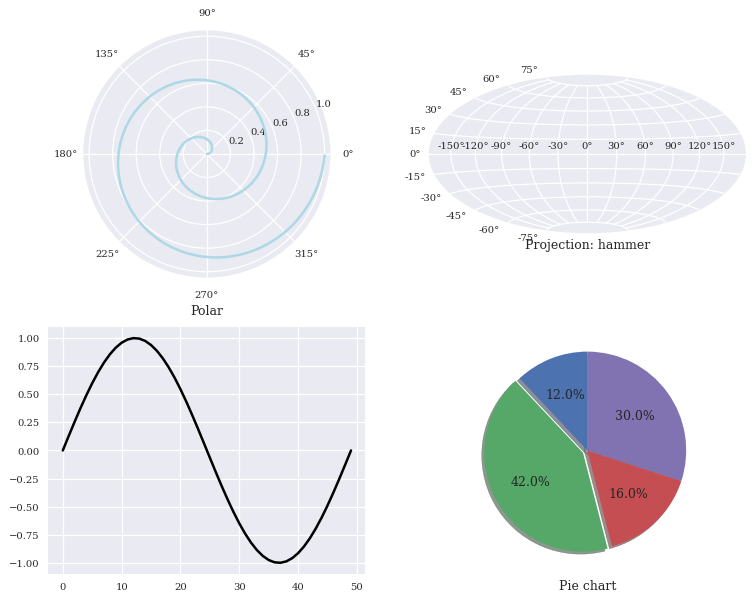

In [13]:
plt.figure(figsize=(10, 8), dpi=90)
ax1 = plt.subplot(221, projection='polar')
r = np.arange(0, 1, 0.001)
theta = 2 * 2*np.pi * r
ax1.plot(theta, r, color='lightblue', lw=2)
ax1.set_xlabel('Polar')

ax2 = plt.subplot(222, projection="hammer")
ax2.set_xlabel('Projection: hammer')

ax3 = plt.subplot(223)
x = np.linspace(0, 2 * np.pi, 50)
ax3.plot(np.sin(x), 'k-', lw=2)

ax4 = plt.subplot(224)
ax4.pie([12, 42, 16, 30], explode=(0, 0.05, 0, 0), autopct='%1.1f%%', shadow=True, startangle=90)
ax4.set_xlabel('Pie chart')

* subplot2grid

从上面可以看出每个子绘画区所占的空间是相等的，subplot2grid可以用来调整子绘画区所占空间的大小，允许轴对象跨越多个行或列，从而是绘图的布局更加灵活。

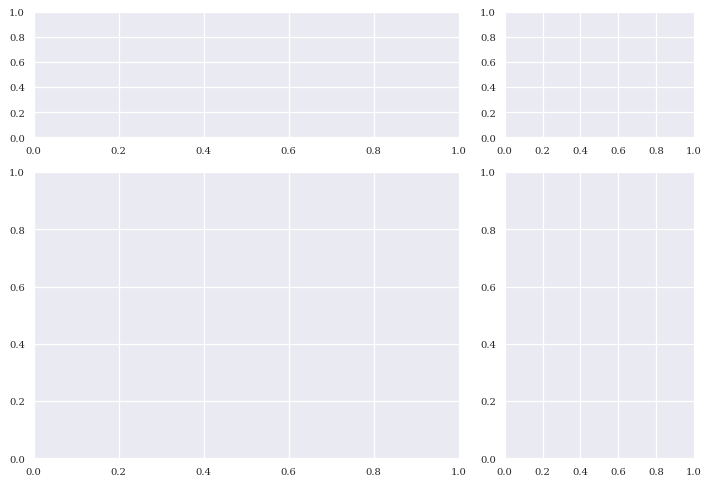

In [14]:
fig = plt.figure(dpi=90)
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (0, 2))
ax3 = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
fig.tight_layout()

* gridspec

`gridspec` 通过调整行和列的相对高度和宽度来设置子绘图区的布局。

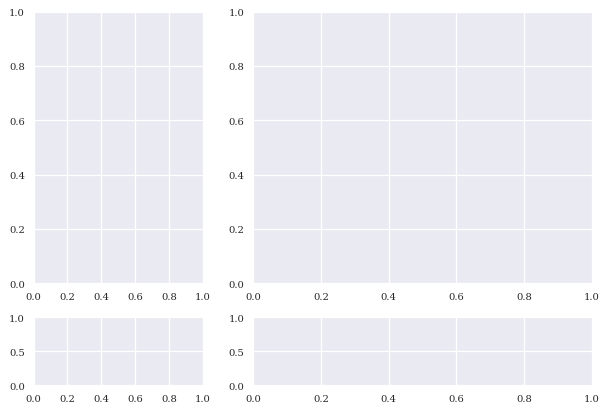

In [15]:
import matplotlib.gridspec as gridspec

fig = plt.figure(dpi=90)
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 2], height_ratios=[4, 1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

------

### Contours and colormaps

`pcolormesh`、`imshow`、`contourf`、`contour` 是绘制2D场数据的常用函数。 [这里]( https://matplotlib.org/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py) 提供了matplotlib所支持的颜色图。

<ipython-input-16-c7e12eb6669d>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  h1 = ax[0, 0].pcolormesh(X, Y, Z, cmap=plt.get_cmap('PiYG'), vmin=Z.min(), vmax=Z.max())


Text(0.5, 1.0, 'contour')

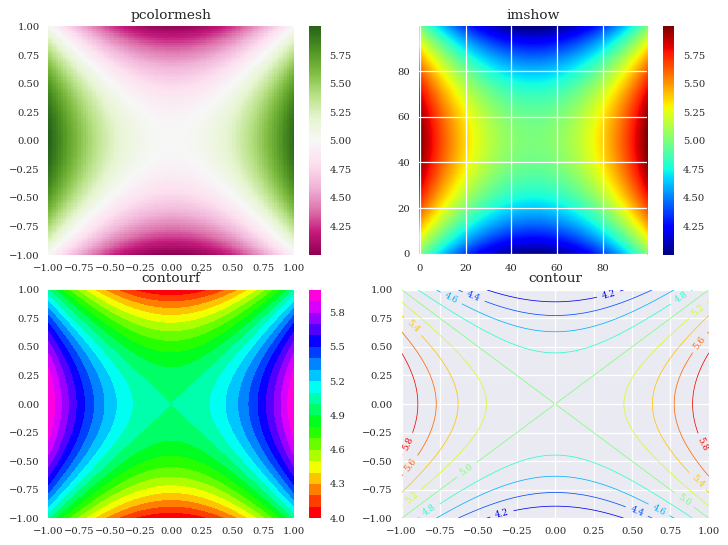

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6), dpi=90)
fig.tight_layout()

x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)

X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2 + 5.

h1 = ax[0, 0].pcolormesh(X, Y, Z, cmap=plt.get_cmap('PiYG'), vmin=Z.min(), vmax=Z.max())
fig.colorbar(h1, ax=ax[0, 0])
ax[0, 0].set_title('pcolormesh')

h2 = ax[0, 1].imshow(Z, cmap=plt.get_cmap('jet'), vmin=Z.min(), vmax=Z.max(), origin='lower')
fig.colorbar(h2, ax=ax[0, 1])
ax[0, 1].set_title('imshow')

h3 = ax[1, 0].contourf(X, Y, Z, 21, cmap=plt.get_cmap('gist_rainbow'), vmin=Z.min(), vmax=Z.max())
fig.colorbar(h3, ax=ax[1, 0])
ax[1, 0].set_title('contourf')

h4 = ax[1, 1].contour(X, Y, Z, 10, cmap=plt.get_cmap('jet'), vmin=Z.min(), vmax=Z.max())
ax[1, 1].clabel(h4, inline=1, fontsize=7)
ax[1, 1].set_title('contour')

------

### 3D plots

3D图形的创建需要使用`projection=3d`的关键字来创建一个`axes3D`对象。

Text(0.5, 0.92, 'Trisurf3D')

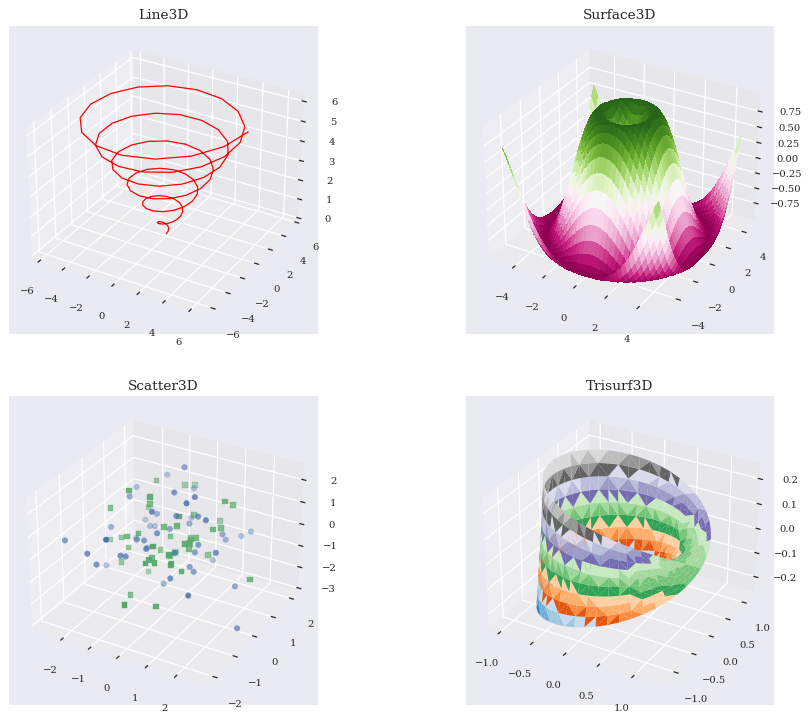

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

fig = plt.figure(figsize=(12, 10), dpi=90)
fig.tight_layout()

ax1 = plt.subplot(221, projection='3d')
t = np.linspace(0.0, 2 * np.pi, 100)
x = t * np.cos(6*t)
y = t * np.sin(6*t)
ax1.plot(x, y, t, 'r-', lw=1)
ax1.set_title('Line3D')

ax2 = plt.subplot(222, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax2.plot_surface(X, Y, Z, cmap=plt.get_cmap('PiYG'), linewidth=0, antialiased=False)
ax2.set_title('Surface3D')

ax3 = plt.subplot(223, projection='3d')
x1, y1, z1 = np.random.normal(size=(3, 50))
x2, y2, z2 = np.random.normal(size=(3, 50))
ax3.scatter(x1, y1, z1)
ax3.scatter(x2, y2, z2, marker='s')
ax3.set_title('Scatter3D')

ax4 = plt.subplot(224, projection='3d')
u = (np.linspace(0, 2.0 * np.pi, endpoint=True, num=50) * np.ones((10, 1))).flatten()
v = np.repeat(np.linspace(-0.5, 0.5, endpoint=True, num=10), repeats=50).flatten()
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)
tri = mtri.Triangulation(u, v)
ax4.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.get_cmap('tab20c'))
ax4.set_title('Trisurf3D')

------

### PyQtGraph

matplotlib在可视化中的主要缺点是对实时数据的刷新慢，视频和实时交互性功能有限。 对图像更新速度有要求的用户，[PyQtGraph](http://pyqtgraph.org/) 是不错的选择。它是建立在PyQt4/PySide和NumPy上的Python图形和GUI库，专门用于数学/科学/工程应用。使用matplotlib作为主要的可视化工具，PyQtGraph用于实时更新数据作为补充手段，将解决大多数问题。

------

### More reading
* [Matplotlib main page](https://matplotlib.org/)
* [Matplotlib Gallery](https://matplotlib.org/gallery.html) - A large number of showcases consisting of various types of plots with Python source included. You can always find one that satisfies your requirements. Highly recommend.
* [Matplotlib tutorials](https://matplotlib.org/tutorials/index.html)
* [PyQtGraph documentation](http://pyqtgraph.org/documentation/)
* [SciPy lecture notes: plotting](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)